In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/home/martin/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# BASEDIR = '/content/gdrive/MyDrive/tools4f/'  # colab
BASEDIR = '../../data/'  # jupyter

In [6]:
SEED = 420

# Load preprocessed data

In [7]:
# df = pd.read_pickle(BASEDIR + 'df_merged_train_test.pickle')
df = pd.read_pickle(BASEDIR + 'df_merged_base_train_val.pickle')

X_train = df[0]
y_train = df[1]
X_val = df[2]
y_val = df[3]

X_train.frequency = X_train.frequency.astype('int8')
X_train.sum_ins = X_train.sum_ins.astype('int8')
X_train.pol_period = X_train.pol_period.astype('int8')
X_train.sex = X_train.sex.astype('int8')
X_train.entry_age = X_train.entry_age.astype('int8')
X_train.cnt_months = X_train.cnt_months.astype('int8')

X_val.frequency = X_val.frequency.astype('int8')
X_val.sum_ins = X_val.sum_ins.astype('int8')
X_val.pol_period = X_val.pol_period.astype('int8')
X_val.sex = X_val.sex.astype('int8')
X_val.entry_age = X_val.entry_age.astype('int8')
X_val.cnt_months = X_val.cnt_months.astype('int8')

In [8]:
print('# Train samples:', len(X_train))
print('# Val samples:', len(X_val))

# Train samples: 21036288
# Val samples: 5259072


## Optional: Pick smaller data for training

In [12]:
xy_train = pd.concat([X_train, y_train], axis=1)
xy_train_subset = xy_train.sample(frac=0.01, replace = False, random_state = np.random.RandomState())

In [13]:
y_train = xy_train_subset.pv_cf_rdr
X_train = xy_train_subset.drop(columns=['pv_cf_rdr'])

## Pick validation data

In [14]:
# # first divison - train, validation
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, train_size=0.8, test_size=0.2, random_state=SEED)

In [16]:
print('# Train samples:', len(X_train))
print('# Val samples:  ', len(X_val))
# print('# Test samples: ', len(X_test))

# Train samples: 21036
# Val samples:   5259072


# One Hot Encoding

In [17]:
# Get one hot encoding
dummies_train = pd.get_dummies(X_train['frequency'])
dummies_val = pd.get_dummies(X_val['frequency'])

In [18]:
dummies_train.columns = ['frequency_1', 'frequency_2', 'frequency_4', 'frequency_11', 'frequency_12']
dummies_val.columns = ['frequency_1', 'frequency_2', 'frequency_4', 'frequency_11', 'frequency_12']

In [19]:
# Drop encoded column
X_train = X_train.drop('frequency', axis=1)
X_val = X_val.drop('frequency', axis=1)

In [20]:
# Join the encoded
X_train = X_train.join(dummies_train)
X_val = X_val.join(dummies_val)

In [21]:
X_train

,sum_ins,pol_period,sex,entry_age,cv_ps_0,beta0,beta1,beta2,tau,cnt_months,frequency_1,frequency_2,frequency_4,frequency_11,frequency_12
9610796,64,30,1,40,344.798039,0.022685,-0.034793,0.084107,4.378151,29,0,0,0,0,1
13689129,64,10,1,40,11313.724399,0.014024,-0.028495,0.078612,4.969331,95,0,0,0,0,1
4369149,64,10,1,40,11313.724399,0.031299,-0.042507,0.082963,2.913211,95,0,0,1,0,0
26328432,32,40,0,20,1562.950802,0.014965,-0.027400,0.058273,3.344095,113,1,0,0,0,0
10185622,-96,30,0,30,282.042353,0.025656,-0.042380,0.098201,4.101122,11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600187,32,30,1,30,52.491012,0.038953,-0.050720,0.093556,2.631029,23,0,0,1,0,0
16146805,64,20,1,40,2642.443928,0.003884,-0.010466,0.037106,5.960667,71,0,0,1,0,0
12691937,-96,30,0,20,1680.680934,0.018179,-0.033825,0.087119,4.625637,71,0,0,0,1,0
6617653,64,20,1,50,7009.263049,0.022536,-0.043109,0.090463,3.387008,101,0,0,0,0,1


# Optional: Standardize data

In [22]:
X_train_toscale = X_train[['sum_ins', 'pol_period', 'entry_age', 'beta0', 'beta1', 'beta2', 'tau', 'cv_ps_0', 'cnt_months']]
X_val_toscale = X_val[['sum_ins', 'pol_period', 'entry_age', 'beta0', 'beta1', 'beta2', 'tau', 'cv_ps_0', 'cnt_months']]

In [23]:
X_train_nottoscale = X_train[['sex', 'frequency_1', 'frequency_2', 'frequency_4', 'frequency_11', 'frequency_12']]
X_val_nottoscale = X_val[['sex', 'frequency_1', 'frequency_2', 'frequency_4', 'frequency_11', 'frequency_12']]

In [24]:
standard_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(X_train_toscale), columns=X_train_toscale.columns, index=X_train_toscale.index)
X_val_scaled = pd.DataFrame(
    standard_scaler.transform(X_val_toscale), columns=X_val_toscale.columns, index=X_val_toscale.index)

In [25]:
X_train = pd.concat([X_train_scaled, X_train_nottoscale], axis=1)
X_val = pd.concat([X_val_scaled, X_val_nottoscale], axis=1)

# Basic regression NN

In [42]:
model_1 = Sequential()
model_1.add(Dense(15, activation='relu', input_shape=(15,)))
model_1.add(Dense(15, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='Adam', loss='mse')

In [43]:
%%time
history_1 = model_1.fit(
    x=X_train,
    y=y_train,
    validation_split=0.25,
    batch_size=256,
    epochs=5,
    initial_epoch=0,
)
model_1.summary()

Epoch 1/5
62/62 [==============================] - 0s 3ms/step - loss: 50346704896.0000 - val_loss: 51260919808.0000
Epoch 2/5
62/62 [==============================] - 0s 3ms/step - loss: 50345574400.0000 - val_loss: 51258789888.0000
Epoch 3/5
62/62 [==============================] - 0s 5ms/step - loss: 50341859328.0000 - val_loss: 51252826112.0000
Epoch 4/5
62/62 [==============================] - 0s 2ms/step - loss: 50332868608.0000 - val_loss: 51239833600.0000
Epoch 5/5
62/62 [==============================] - 0s 3ms/step - loss: 50315333632.0000 - val_loss: 51216773120.0000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_______________________________________________________________

### Save model

In [44]:
model_1.save('out_model')

INFO:tensorflow:Assets written to: out_model/assets


In [45]:
loaded_model = tf.keras.models.load_model('out_model')

In [46]:
loaded_model

## Evaluation

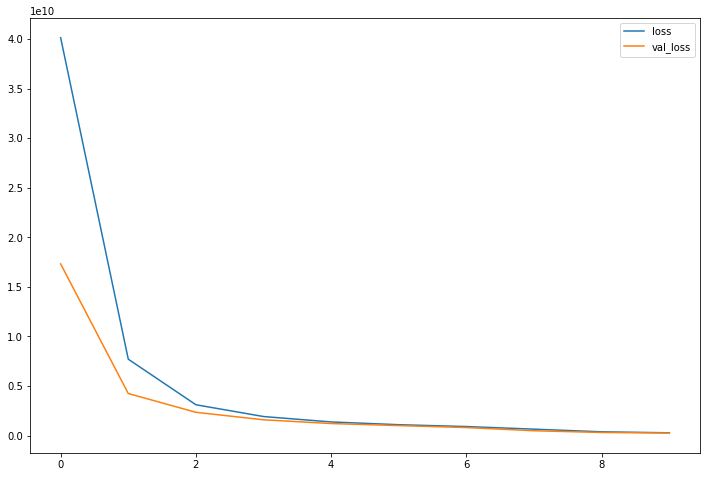

In [29]:
loss_df = pd.DataFrame(history_1.history)
loss_df.plot(figsize=(12,8))

In [30]:
%%time
y_pred_train = model_1.predict(X_train)
print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train)*100)

Train MAPE: 131.28969969834904
CPU times: user 27 s, sys: 3.33 s, total: 30.3 s
Wall time: 18.9 s


In [31]:
%%time
y_pred_val = model_1.predict(X_val)
print('Val MAPE:', metrics.mean_absolute_percentage_error(y_val, y_pred_val)*100)

Val MAPE: 435.1890407541355
CPU times: user 1min 50s, sys: 9.22 s, total: 1min 59s
Wall time: 1min 26s


In [32]:
# export predictions
df_predictions = pd.DataFrame()
y_true_series = pd.DataFrame(y_val)
y_pred_series = pd.DataFrame([item for sublist in y_pred_val for item in sublist])

y_true_series.reset_index(drop=True, inplace=True)
y_pred_series.reset_index(drop=True, inplace=True)
df_predictions['y_true'] = y_true_series
df_predictions['y_pred'] = y_pred_series

df_predictions

,y_true,y_pred
0,-83862.531077,-82554.875000
1,-65637.196683,-82541.093750
2,-7271.691441,-12957.627930
3,-6076.361104,-12964.793945
4,-150124.544847,-158016.468750
...,...,...
5259067,-86785.717587,-85295.046875
5259068,41518.011475,8962.948242
5259069,-7631.515180,329.070038
5259070,-188544.490831,-170768.531250


In [38]:
# percentage error through the whole portfolio
percentage_error = \
(df_predictions['y_true'].sum() - df_predictions['y_pred'].sum())/(df_predictions['y_true'].sum())*100
print('Percentage error for portfolio: ' + str(percentage_error) + '%')

Percentage error for portfolio: -0.030346643466484958%


In [30]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_val))  
print('MSE:', metrics.mean_squared_error(y_val, y_pred_val))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
print('VarScore:',metrics.explained_variance_score(y_val, y_pred_val))

MAE: 5613.071994338869
MSE: 83631606.44487777
RMSE: 9145.031790260642
VarScore: 0.9974363582741496


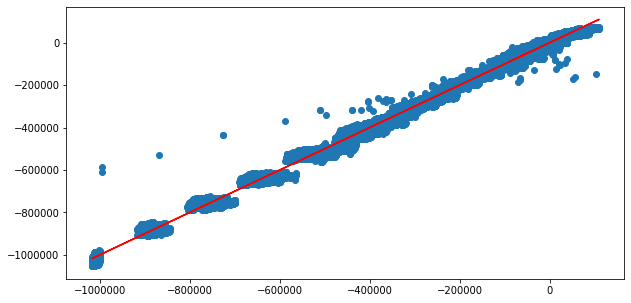

In [31]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred_val)
# Perfect predictions
plt.plot(y_val,y_val,'r')

In [51]:
y_val

24427982    -24380.051648
22554371    -80279.776314
5741771     -63667.231390
11625291    -33990.284520
13380776    -85287.318642
                ...      
25185608    -46483.049387
11174461   -377834.817878
26879691    -80094.616728
29496968    -51482.161813
7603408     -88094.570647
Name: pv_cf_rdr, Length: 525908, dtype: float64

In [60]:
y_pred_val

array([[-20757.416],
       [-78208.875],
       [-64072.004],
       ...,
       [-81976.09 ],
       [-51515.344],
       [-88853.266]], dtype=float32)

In [69]:
pd.DataFrame(y_val)

,pv_cf_rdr
24427982,-24380.051648
22554371,-80279.776314
5741771,-63667.231390
11625291,-33990.284520
13380776,-85287.318642
...,...
25185608,-46483.049387
11174461,-377834.817878
26879691,-80094.616728
29496968,-51482.161813


In [68]:
pd.DataFrame([item for sublist in y_pred_val for item in sublist])

,0
0,-20757.416016
1,-78208.875000
2,-64072.003906
3,-35283.257812
4,-83192.500000
...,...
525903,-45327.820312
525904,-386084.843750
525905,-81976.093750
525906,-51515.343750


In [108]:
result = pd.DataFrame()

In [109]:
a = pd.DataFrame(y_val)
index = a.index
b = pd.DataFrame([item for sublist in y_pred_val for item in sublist])

a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)

In [110]:
result['y_true'] = a
result['y_pred'] = b

In [112]:
result.set_index(index)

,y_true,y_pred
24427982,-24380.051648,-20757.416016
22554371,-80279.776314,-78208.875000
5741771,-63667.231390,-64072.003906
11625291,-33990.284520,-35283.257812
13380776,-85287.318642,-83192.500000
...,...,...
25185608,-46483.049387,-45327.820312
11174461,-377834.817878,-386084.843750
26879691,-80094.616728,-81976.093750
29496968,-51482.161813,-51515.343750
